In [2]:
#shift+enter task
import pandas as pd
from efficient_apriori import apriori
df = pd.read_csv('Case Data.csv', sep=",")
#Case Data.csv is too big for github uploads, I'm sorry, I'll find a way
print("Доля строк с NaN", df[df.isna().sum(axis = 1)>0].shape[0]/df.shape[0])
print("Количество значений NaN в каждом столбце\n", df.isna().sum(axis = 0))
# Больше всего NaN-значений содержит столбцы Кэшбэк, Бренд и Теги

Доля строк с NaN 0.8369846338636194
Количество значений NaN в каждом столбце
 ﻿id чека               0
Дата и время           0
ИНН                    0
IDПользователя         0
Товар                  0
Бренд             178495
Теги              128391
Цена                  52
Кол-во                52
Сумма                 52
Кэшбэк            253552
dtype: int64


In [3]:
df['Теги'].fillna(df['Товар'], inplace=True)
records = list(map(tuple, [data for data in df.groupby(df[df.columns[0]])['Теги'].unique()]))

In [39]:
item, rules = apriori(records, min_support=0.002, min_confidence=0.2)

In [40]:
for rule in rules:
    print(rule)

{пюре детское; детское питание} -> {детское питание; пюре детское} (conf: 0.560, supp: 0.006, lift: 52.401, conv: 2.247)
{детское питание; пюре детское} -> {пюре детское; детское питание} (conf: 0.549, supp: 0.006, lift: 52.401, conv: 2.196)
{овощи/фрукты/ягоды; томаты; продукты; овощи} -> {пакет-майка магнит} (conf: 0.488, supp: 0.003, lift: 8.283, conv: 1.839)
{огурцы; овощи/фрукты/ягоды; продукты; овощи} -> {пакет-майка магнит} (conf: 0.295, supp: 0.003, lift: 4.999, conv: 1.334)
{яйцо; продукты; молоко/сыр/яйца; куриное} -> {пакет-майка магнит} (conf: 0.492, supp: 0.003, lift: 8.354, conv: 1.854)
{лимоны 1кг} -> {пакет-майка магнит} (conf: 0.551, supp: 0.003, lift: 9.340, conv: 2.094)
{игрушка; прочее} -> {прочее; упаковка; пакеты} (conf: 0.456, supp: 0.002, lift: 13.736, conv: 1.777)
{картофель; продукты; овощи/фрукты/ягоды; овощи} -> {пакет-майка магнит} (conf: 0.548, supp: 0.002, lift: 9.299, conv: 2.083)
{бакалея; сахар; продукты} -> {пакет-майка магнит} (conf: 0.435, supp: 0.0

In [35]:
brands = ['Pampers', 'Ariel', 'Tide', 'Миф', 'Lenor', 'Always', 'Tampax', 'Naturella', 'Discreet', 'Braun', 'Gillette', 'Venus', 'Head & Shoulders', 'Pantene', 'Herbal Essences', 'Aussie', 'Bear Fruits', 'Fairy', 'Mr. Proper', 'Oral-B', 'Blend-a-Med', 'Clearblue', 'Old Spice', 'Safeguard']
brand = []
count = []

Pampers: 3505
Ariel: 2523
Tide: 1960
Миф: 265
Lenor: 5207
Always: 10737
Tampax: 228
Naturella: 2985
Discreet: 6244
Braun: 3
Gillette: 5718
Venus: 1122
Head & Shoulders: 0
Pantene: 3848
Herbal Essences: 0
Aussie: 356
Bear Fruits: 0
Fairy: 4266
Mr. Proper: 1936
Oral-B: 1106
Blend-a-Med: 1764
Clearblue: 64
Old Spice: 2315
Safeguard: 1014


<BarContainer object of 24 artists>

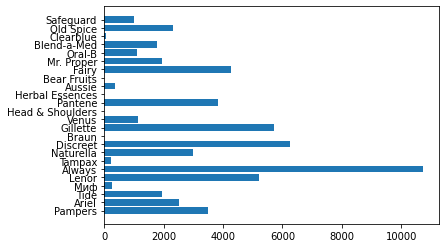

In [36]:
def count_brand(dataset, brand_name):
    found_rows = df['Бренд'].str.contains(brand_name.lower()).sum()
    print(brand_name + ":", "%0.0f" % found_rows)
    return found_rows
for b in brands:
    brand.append(b)
    count.append(count_brand(df, b))
import matplotlib.pyplot as plt
plt.barh(brand, count)